# **Regressors** 
Let's Boost Our Knowledge with Regression Problems and be Ready for All of it,


# Important Note :-
While dealing with vectors  [ 1D Array ] =  1 Feature  or 1 Label
Some functions such as fitting and transforming would require the input to be reshaped , try to just add a line  for this  when you want to reshape `X` 
you just type  :-
`X= X.reshape(-1,1)  `

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os 
os.chdir('drive/My Drive/Split3 : Machine Learning')

# **First**   : Come and Have A look on a Comparison Between Polynomial Regression and Linear Regression
 

R squared of Linear Regression : 0.9569566641435086
R squared of Polynomial Regression : 0.9665546834956732


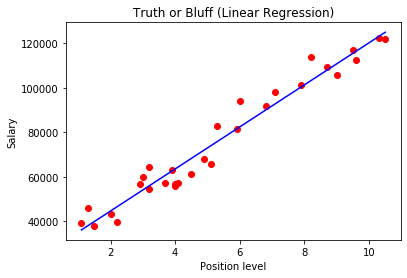

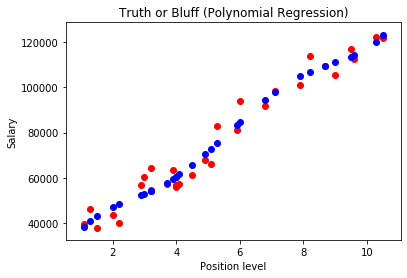

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Importing the dataset
df= pd.read_csv('Salary_Data.csv')
X= df.iloc[:,0].values
y=df.iloc[:,1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 , shuffle= False)
'''
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
'''

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

#Evaluation
from sklearn.metrics import r2_score
Er1=r2_score(y,lin_reg.predict(X))
Er2=r2_score(y,lin_reg_2.predict(poly_reg.fit_transform(X)))
print('R squared of Linear Regression :', Er1)
print('R squared of Polynomial Regression :', Er2)

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.scatter(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



# Explanation
Let's Explore The code of Polynomial Regression  in more Details

Polynomial Regression works by  Transforming the Current Features into Polynomial Features 
In Our Case we only have 1  Feature and we do want to convert it for example to 10 Poly Features  let's see how can we do this and how would they look like 

In [3]:
pd.DataFrame(X).head(5)  # Let's have a look on Our X
# I've Chose to visualize it as a data frame cause The Array is currently  look like [ [1.1],[1.3],[1.5],... ] which is not the best way to see

,0
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [4]:
from sklearn.preprocessing   import PolynomialFeatures
#Instantiate
poly=PolynomialFeatures(degree=20) # Number of Degree is Hyperparameter so you can try it till you get the Best Results
Poly_X= poly.fit_transform(X)

# What is the PolyFeatures ?

The Poly Features is a Matrix Generated from  Our Actual Features which is X_train

Poly Features Size is equal to ( Number of Rows , The Degree of the Polynomial)
The  Rows indicates the Data Rows 
The Columns indicates the Polynomial Features which is Generated from our Column

So we can tell that our Column Got Transformed into abig Matrix.



In [5]:
# Let's See Now the Poly features  of Array X 
pd.DataFrame(Poly_X).head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.1,1.21,1.331,1.4641,1.61051,1.771561,1.948717,2.143589,2.357948,...,2.853117,3.138428,3.452271,3.797498,4.177248,4.594973,5.054470,5.559917e+00,6.115909e+00,6.727500e+00
1,1.0,1.3,1.69,2.197,2.8561,3.71293,4.826809,6.274852,8.157307,10.604499,...,17.921604,23.298085,30.287511,39.373764,51.185893,66.541661,86.504159,1.124554e+02,1.461920e+02,1.900496e+02
2,1.0,1.5,2.25,3.375,5.0625,7.59375,11.390625,17.085938,25.628906,38.443359,...,86.497559,129.746338,194.619507,291.929260,437.893890,656.840836,985.261253,1.477892e+03,2.216838e+03,3.325257e+03
3,1.0,2.0,4.00,8.000,16.0000,32.00000,64.000000,128.000000,256.000000,512.000000,...,2048.000000,4096.000000,8192.000000,16384.000000,32768.000000,65536.000000,131072.000000,2.621440e+05,5.242880e+05,1.048576e+06
4,1.0,2.2,4.84,10.648,23.4256,51.53632,113.379904,249.435789,548.758735,1207.269218,...,5843.183014,12855.002631,28281.005788,62218.212734,136880.068015,301136.149634,662499.529195,1.457499e+06,3.206498e+06,7.054295e+06


# Explanation 
So we can tell that " Polynomial Features " Is some how a way of Transformation for the Features but thats not  a Model yet ,  you need to Build a model to get fit on this  which can be basically a linear Regression 

To fit a **Linear Regression** Model to **Normal Features** we use :-


```
LinReg.fit(X_train, y_train)
LinReg.predict(X_test)
```




and To Fit a **Linear regression** Model to **Poly features** we type it like this 

```
LinReg.fit(poly.fit_transform(X_train), y_train)
LinReg.predict(poly.transform(X_test))
```





# Regularization Techniques  
It is about Putting a Penality Term to the Model 


*   Ridge =RSS + Alpha* Squared (Slope)
*   Lasso = RSS+ Alpha *Abs(Slope)

# Ridge Regression

C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.23047e-17): result may not be accurate.
  overwrite_a=True).T


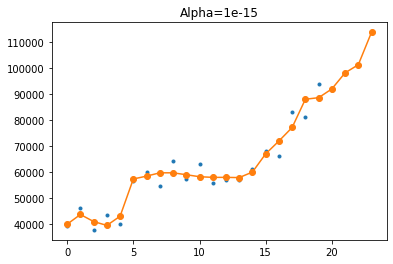

------------------


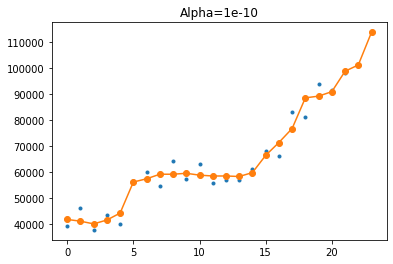

------------------


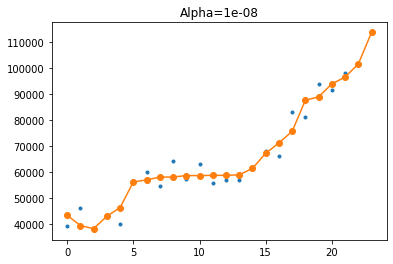

------------------


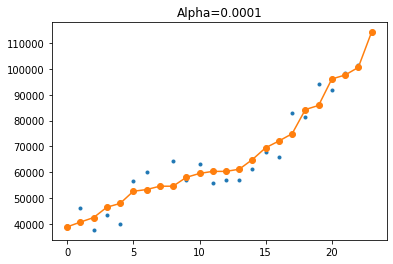

------------------


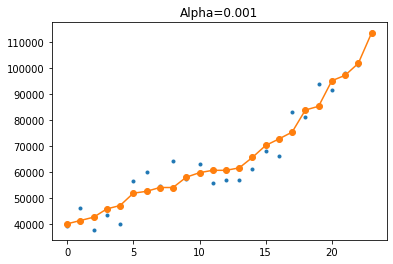

------------------


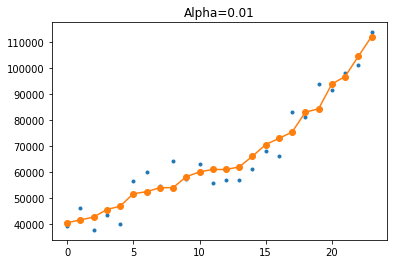

------------------


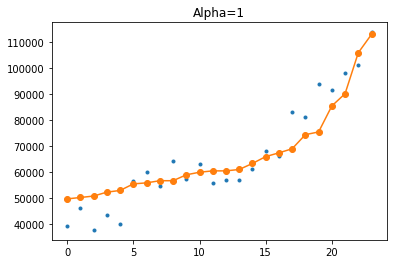

------------------


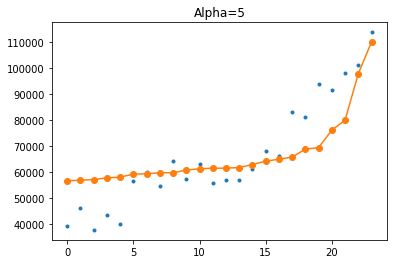

------------------


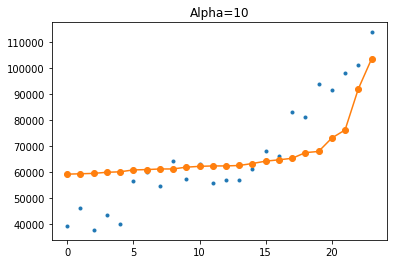

------------------


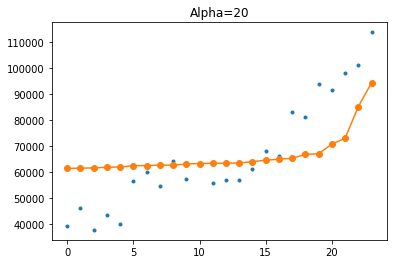

------------------


In [6]:
for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(poly.fit_transform(X_train), y_train)
    plt.title('Alpha=%s' %alpha)
    plt.plot(y_train ,'.', ridge.predict(poly.fit_transform(X_train)),'-o')
    plt.show()
    print('------------------')

# Lasso Regression 

C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301219845.72456664, tolerance: 1026733.8181833336
  positive)


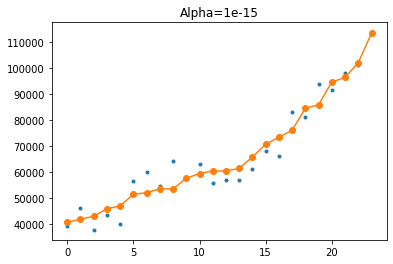

----------------------------------------------------------


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301219845.7098346, tolerance: 1026733.8181833336
  positive)


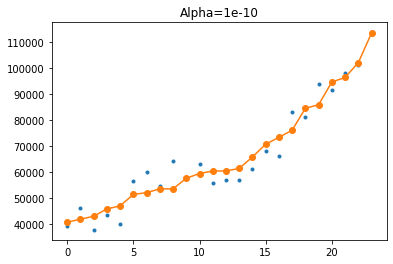

----------------------------------------------------------


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301219844.25106287, tolerance: 1026733.8181833336
  positive)


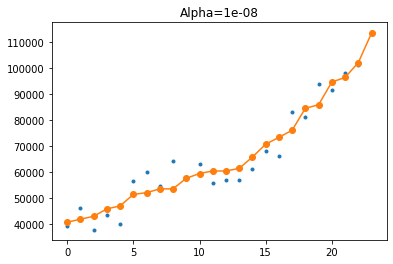

----------------------------------------------------------


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301218372.2186642, tolerance: 1026733.8181833336
  positive)


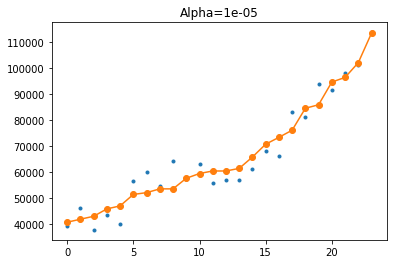

----------------------------------------------------------


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301205110.56257385, tolerance: 1026733.8181833336
  positive)


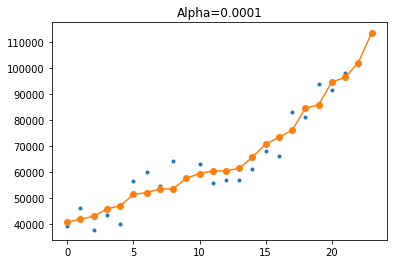

----------------------------------------------------------


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301072477.08261013, tolerance: 1026733.8181833336
  positive)


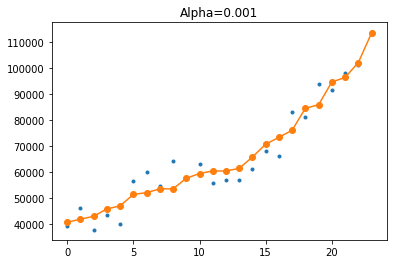

----------------------------------------------------------


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299744489.3916858, tolerance: 1026733.8181833336
  positive)


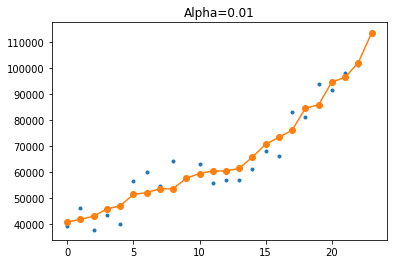

----------------------------------------------------------


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139869737.47765297, tolerance: 1026733.8181833336
  positive)


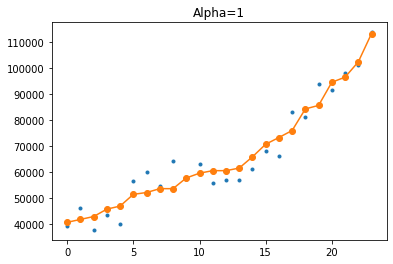

----------------------------------------------------------


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10317257.461210608, tolerance: 1026733.8181833336
  positive)


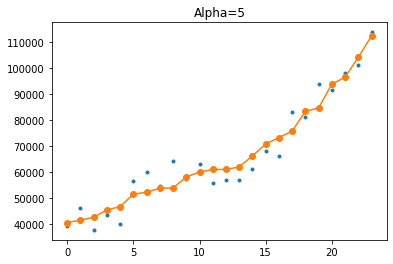

----------------------------------------------------------


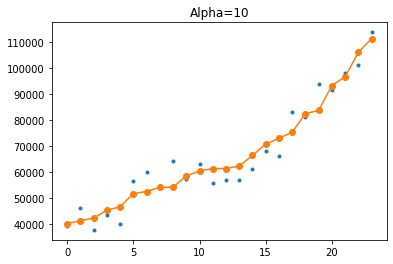

----------------------------------------------------------


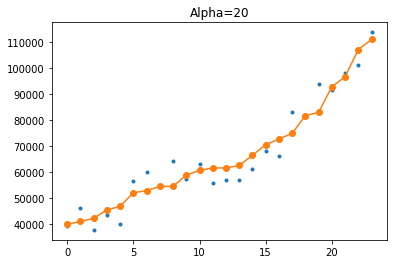

----------------------------------------------------------


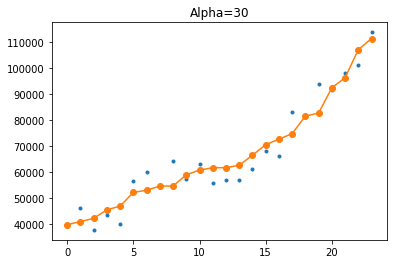

----------------------------------------------------------


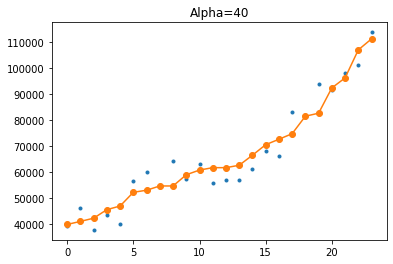

----------------------------------------------------------


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,6984.043178,-747.874198,104.396552,13.963379,0.800985,-0.012366,-0.009784,-0.001582,-0.000189,...,-1.703482e-06,-1.279671e-07,-6.703315e-09,1.143168e-10,1.077011e-10,2.232512e-11,3.606783e-12,5.236586e-13,7.169590e-14,9.464981e-15
1,0.0,6984.043178,-747.874198,104.396552,13.963379,0.800985,-0.012366,-0.009784,-0.001582,-0.000189,...,-1.703482e-06,-1.279671e-07,-6.703315e-09,1.143168e-10,1.077011e-10,2.232512e-11,3.606783e-12,5.236586e-13,7.169590e-14,9.464981e-15
2,0.0,6984.043174,-747.874196,104.396551,13.963379,0.800985,-0.012366,-0.009784,-0.001582,-0.000189,...,-1.703482e-06,-1.279671e-07,-6.703315e-09,1.143167e-10,1.077011e-10,2.232512e-11,3.606783e-12,5.236586e-13,7.169590e-14,9.464981e-15
3,0.0,6984.039358,-747.871553,104.396169,13.963357,0.800985,-0.012365,-0.009784,-0.001582,-0.000189,...,-1.703479e-06,-1.279667e-07,-6.703339e-09,1.142626e-10,1.077018e-10,2.232520e-11,3.606792e-12,5.236596e-13,7.169602e-14,9.464995e-15
4,0.0,6984.004963,-747.847744,104.392721,13.963161,0.800989,-0.012358,-0.009784,-0.001582,-0.000189,...,-1.703454e-06,-1.279634e-07,-6.703543e-09,1.137746e-10,1.077080e-10,2.232593e-11,3.606876e-12,5.236692e-13,7.169711e-14,9.465120e-15
5,0.0,6983.660864,-747.609625,104.358249,13.961204,0.801026,-0.012290,-0.009784,-0.001582,-0.000189,...,-1.703200e-06,-1.279306e-07,-6.705536e-09,1.088879e-10,1.077705e-10,2.233319e-11,3.607712e-12,5.237650e-13,7.170803e-14,9.466362e-15
6,0.0,6980.191495,-745.223226,104.013810,13.941626,0.801377,-0.011605,-0.009792,-0.001582,-0.000189,...,-1.700670e-06,-1.276027e-07,-6.718736e-09,5.920111e-11,1.083965e-10,2.240601e-11,3.616104e-12,5.247262e-13,7.181770e-14,9.478847e-15
7,0.0,6108.354321,-395.019318,73.003491,11.767642,0.636427,0.006542,-0.003142,-0.001693,-0.000190,...,-1.490164e-06,-9.416897e-08,-2.350827e-09,-0.000000e+00,-0.000000e+00,-0.000000e+00,4.396276e-13,6.750169e-13,8.981593e-14,1.162322e-14
8,0.0,4359.934867,181.616722,71.266501,2.962330,0.000000,0.000000,-0.000000,-0.000000,-0.000127,...,-9.445640e-07,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.745627e-14
9,0.0,3495.175502,669.670930,18.233379,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-2.102417e-09,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.068273e-15


In [7]:
coeff_matrix = []
for alpha in [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]:
    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha = alpha, normalize=True)
    lasso.fit(poly.fit_transform(X_train), y_train)
    coeff_matrix.append(lasso.coef_)
    plt.title('Alpha=%s'%alpha)  # Do YOU REMEMBER THIS SYNTAX  :D
    plt.plot(y_train ,'.', lasso.predict(poly.fit_transform(X_train)),'-o'  )
    plt.show()
    print('----------------------------------------------------------')
pd.DataFrame(coeff_matrix)

# Let's Say you 've Liked Alpha =1 for Lasso For Example Let's See how to select it and use it 

C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139869737.4776528, tolerance: 1026733.8181833336
  positive)


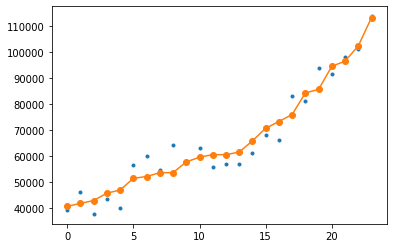

In [8]:
# Select Best  Alpha
lasso = Lasso(alpha = 1, normalize=True)
lasso.fit(poly.fit_transform(X_train),y_train)
plt.plot(y_train, '.',lasso.predict(poly.fit_transform(X_train)),'-o')
plt.show()

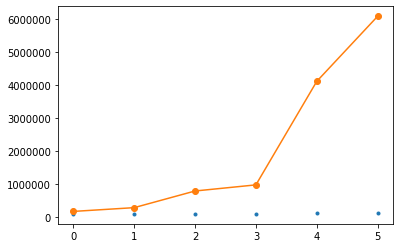

In [9]:
plt.plot(y_test, '.',lasso.predict(poly.transform(X_test)),'-o')

In [10]:
#You can always check the performance of the whole Model by using R Squared 
lasso.fit(poly.fit_transform(X),y)
preds=lasso.predict(poly.fit_transform(X))
R2=r2_score(y,preds)
R2

C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28959486.459711075, tolerance: 2179497.7852000003
  positive)


0.9656364000658936

# **DO NOT**  COPY AND PASTE ANYTHING 
# **TYPE WITH YOUR OWN FINGERS**
you are always allowed to have a look up to remember the Syntax 


I Do Really Enourage you to Restart Kernel  and not Run anything from the Above Cells  so no variables would be taken already or hold a false value
 

### Goal of this Task  is to  Use all The Regression Models we 've learnt so  far  but in a way that make us Get the Best of Everything.

Feel Free to use any Data file or You can use `Salary Data`  No worries , it will work with all 


Try to  Follow the Steps !

**First** : If You are on Colab Right now  Get your Authentication Key

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')
# import os 
# os.chdir('drive/My Drive')  # Fix This if your file is in a Certain Directory in Your Drive

**Second** : 


1.   Load The Data File 
2.   Split Features and Labels
3.   Reshape Features for later Usage 





In [1]:
import  numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt   
df= pd.read_csv('Salary_Data.csv')
X= df.iloc[:, 0].values
y= df.iloc[:, 1].values
X= X.reshape(-1, 1)   # RESHAPED
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

**Third** : 


1.   Split training and Testing Data
2.   Stop the shuffle  for a good Visualization
3.   Fix the Seed to a Constant Number 





In [2]:
from  sklearn.model_selection  import train_test_split 

X_train,X_test,y_train , y_test = train_test_split(X, y, test_size= 0.2, random_state = 0) 

**Forth** : 


1.   Instantiate The Linear Regression Model
2.   Fit the Model to Training Set
3.   Predict The Testing Set 
4.   Evaluate the Model by  R squared method between Preds and Actual Values
5.   Visualize The Model in a Good way 

R2-score is:  0.988169515729126


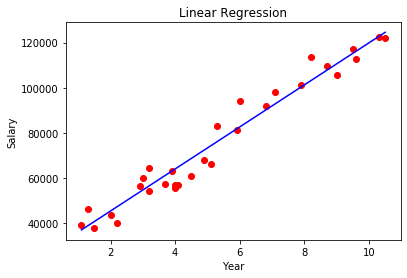

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.predict(X_test)

from sklearn.metrics import r2_score
r2_lin = r2_score(y_test, lin_reg.predict(X_test))
print('R2-score is: ', r2_lin)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

**Fifth** : 


1.   Instantiate The Poly Features with  Degree = 7
2.   Fit and Transform the Training Features into Poly Training Features
3.   Fit the Linear Regression Model to the Poly Training Features and Actual Training Label
4.   Transfrom The Testing Features into Poly Testing Features
5.   Predict The Poly Testing Features
6.   Evaluate the Model by  R squared method between Preds and Actual Values
7.   Visualize The Model in a Good way 











R2-score is:  0.9893108853384935


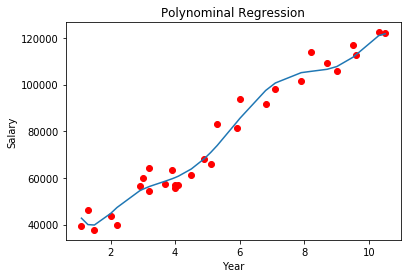

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=7)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_poly, y_train)
lin_reg2.predict(X_test_poly)

r2_poly = r2_score(y_test, lin_reg2.predict(X_test_poly))
print('R2-score is: ', r2_poly)

plt.scatter (X, y, color = 'red')
plt.plot (X, lin_reg2.predict(poly.transform(X)))
plt.title('Polynominal Regression')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

**Sixth**: Make The Fifth Step more Powerful!


Build a Code that Try 20 Degrees like from  Degree 1 to 21
And Return The Best Degree with the Highest R Squared Value 

The R2-score the degree 1  is:  0.988169515729126


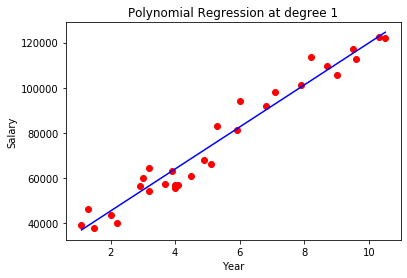

The R2-score the degree 2  is:  0.9882197351491803


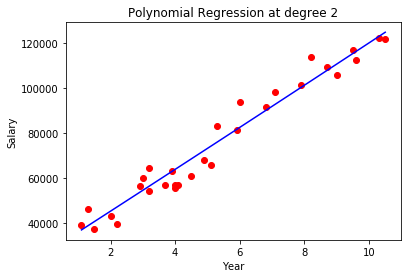

The R2-score the degree 3  is:  0.9862947645567545


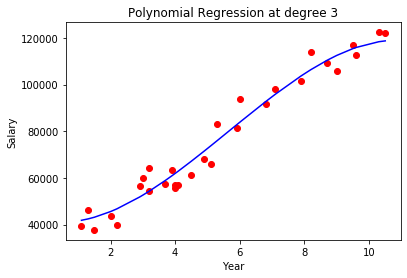

The R2-score the degree 4  is:  0.9863638087307288


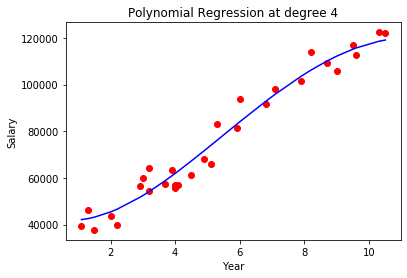

The R2-score the degree 5  is:  0.9804760952761904


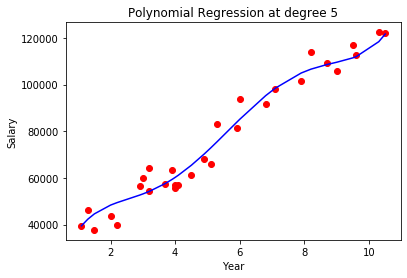

The R2-score the degree 6  is:  0.978288894995337


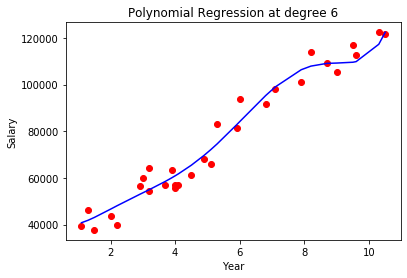

The R2-score the degree 7  is:  0.9893108853132627


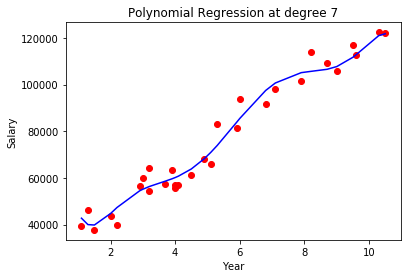

The R2-score the degree 8  is:  0.98669502924854


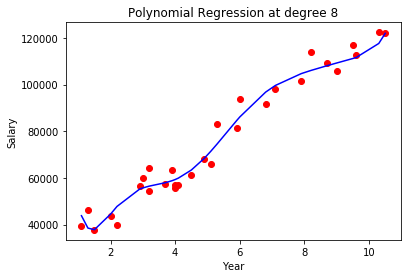

The R2-score the degree 9  is:  0.9585317732402447


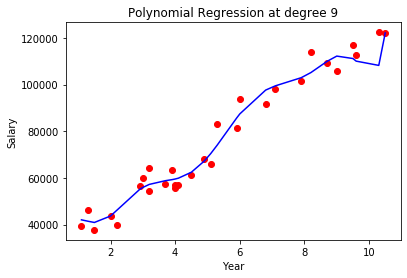

The R2-score the degree 10  is:  0.9031555165463674


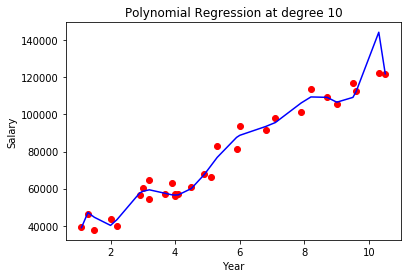

The R2-score the degree 11  is:  0.7946807255878741


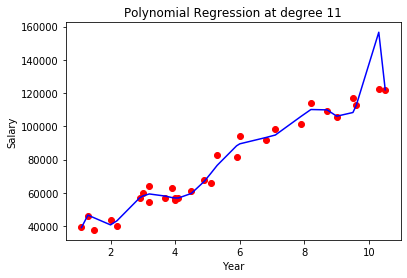

The R2-score the degree 12  is:  0.8905610037069737


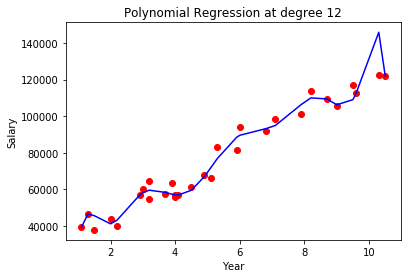

The R2-score the degree 13  is:  0.8968855357370665


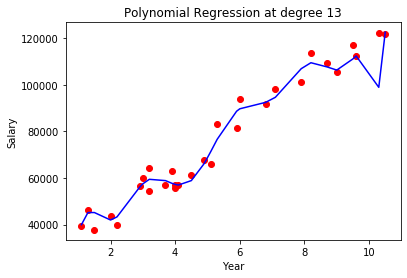

The R2-score the degree 14  is:  0.8569615966108424


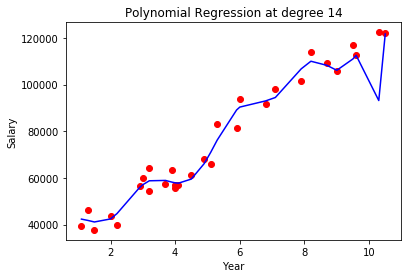

The R2-score the degree 15  is:  0.5489659657245232


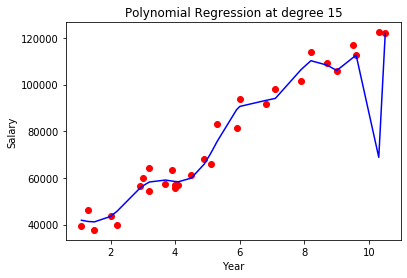

The R2-score the degree 16  is:  0.8274920804268906


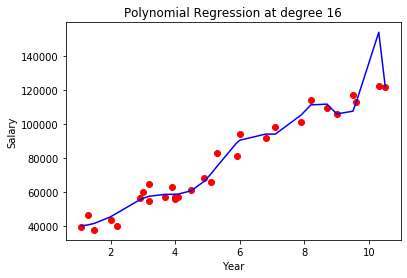

The R2-score the degree 17  is:  -9.856011164273943


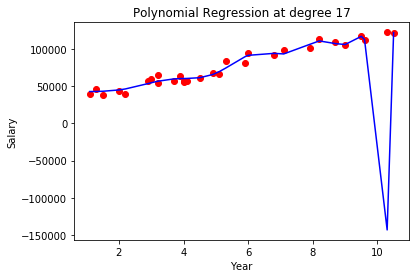

The R2-score the degree 18  is:  -36.34263675948379


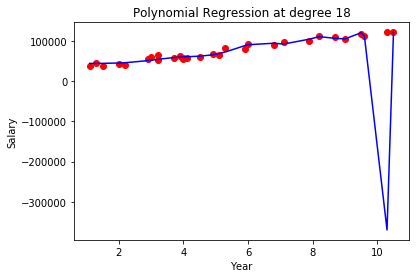

The R2-score the degree 19  is:  -96.59860151990938


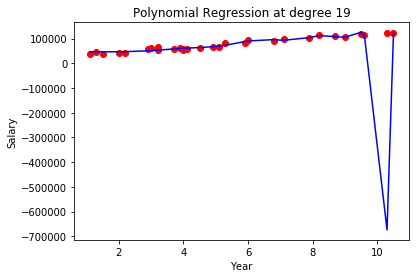

The R2-score the degree 20  is:  -202.56790993494565


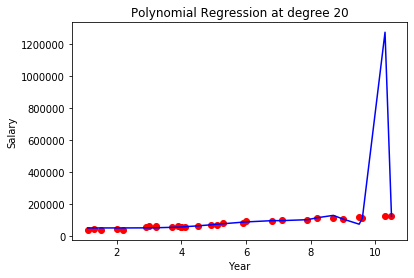

0    7.000000
1    0.989311
Name: 6, dtype: float64

In [6]:
lst = []
for i in range(1, 21):
    poly_n = PolynomialFeatures(degree = i)
    lin_reg3 = LinearRegression()
    lin_reg3.fit(poly_n.fit_transform(X_train), y_train)
    lin_reg3.predict(poly_n.transform(X_test))
    
    r2_n = r2_score(y_test, lin_reg3.predict(poly_n.transform(X_test)))
    print('The R2-score the degree', i, ' is: ', r2_n)
    
    plt.scatter(X, y, color = 'red')
    plt.plot(X, lin_reg3.predict(poly_n.transform(X)), color = 'blue')
    plt.title('Polynomial Regression at degree %s' %i)
    plt.xlabel('Year')
    plt.ylabel('Salary')
    plt.show()
    
    lst1 = []
    lst1.append(i)
    lst1.append(r2_n)
    lst.append(lst1)
    
df_r = pd.DataFrame(lst)
df_r
df_r.iloc[df_r[1].idxmax()]

**Seventh** : 


1.   Instantiate The Ridge Regressor with  Alpha = 1
2.   Fit and Transform the Training Features into Poly Training Features
3.   Fit the Ridge Model to the Poly Training Features and Actual Training Label
4.   Transfrom The Testing Features into Poly Testing Features
5.   Predict The Poly Testing Features
6.   Evaluate the Model by  R squared method between Preds and Actual Values
7.   Visualize The Model in a Good way 

R2-score is:  0.9217591527498833


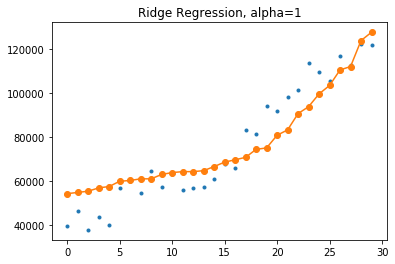

In [7]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, normalize=True)
ridge.fit(poly.fit_transform(X_train), y_train)
r2_ridge = r2_score(y_test, ridge.predict(poly.transform(X_test)))
print('R2-score is: ', r2_ridge)

plt.title('Ridge Regression, alpha=1')
plt.plot(y, '.', ridge.predict(poly.transform(X)), '-o')
plt.show()

**Eighth**
Set Range Of Alphas and Make A function to Select the Best One with resepct to R Squared Metric 

R2-score is:  0.9893108581857212


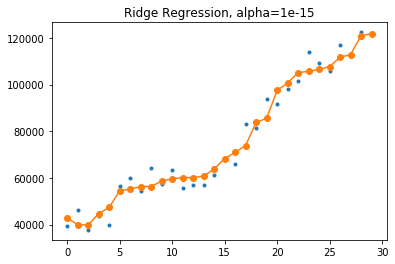

-----------------------------
R2-score is:  0.9872317961236061


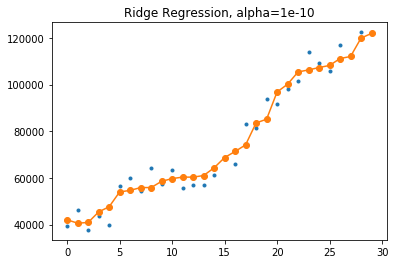

-----------------------------
R2-score is:  0.9785651022449169


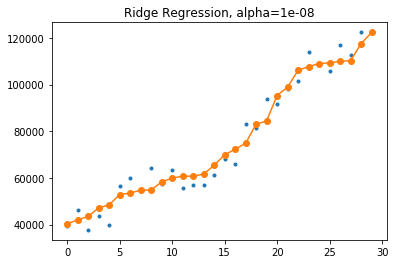

-----------------------------
R2-score is:  0.9826335445728175


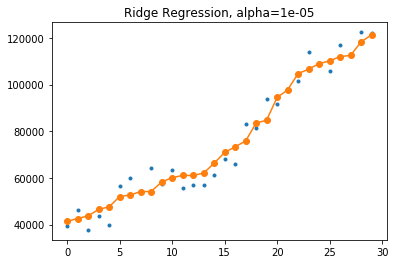

-----------------------------
R2-score is:  0.9852659261232082


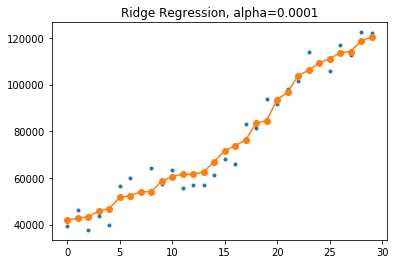

-----------------------------
R2-score is:  0.9870971733258221


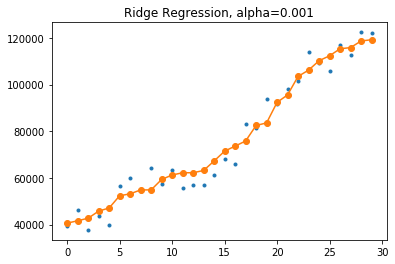

-----------------------------
R2-score is:  0.9873017188618683


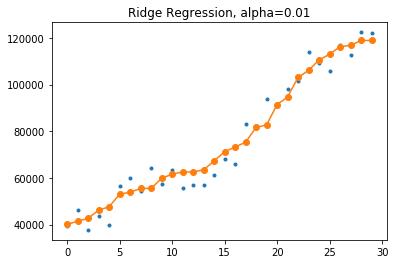

-----------------------------
R2-score is:  0.9217591527498833


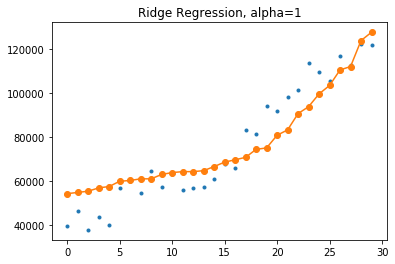

-----------------------------
R2-score is:  0.7309319314712945


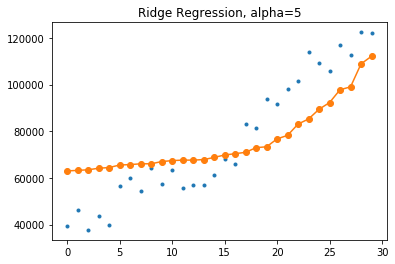

-----------------------------
R2-score is:  0.549977600119179


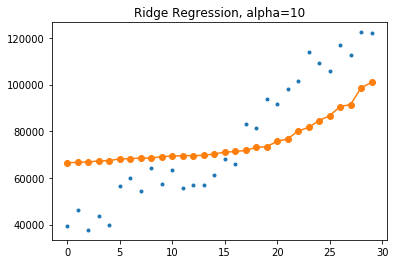

-----------------------------
R2-score is:  0.3431308088085556


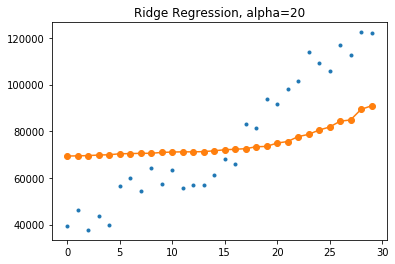

-----------------------------
R2-score is:  0.23397256824050938


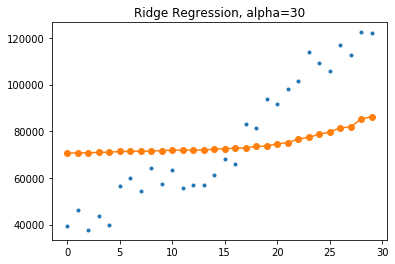

-----------------------------
R2-score is:  0.16734559671635785


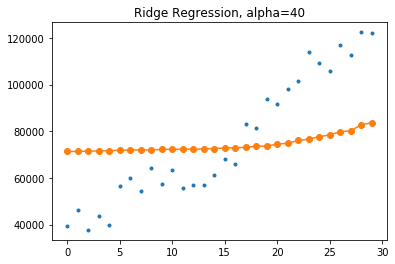

-----------------------------


0    1.000000e-15
1    9.893109e-01
Name: 0, dtype: float64

In [9]:
lst_rdg = []
for i in [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]:
    ridge = Ridge(alpha=i, normalize=True)
    ridge.fit(poly.fit_transform(X_train), y_train)
    r2_ridge = r2_score(y_test, ridge.predict(poly.transform(X_test)))
    print('R2-score is: ', r2_ridge)
    
    plt.title('Ridge Regression, alpha=%s' %i)
    plt.plot(y, '.', ridge.predict(poly.transform(X)), '-o')
    plt.show()
    
    lst = []
    lst.append(i)
    lst.append(r2_ridge)
    lst_rdg.append(lst)
    print('-----------------------------')
    
df_rdg = pd.DataFrame(lst_rdg)
df_rdg
df_rdg.iloc[df_rdg[1].idxmax()]

**Ninth** : 


1.   Instantiate The Lasso Regressor with  Alpha = 1
2.   Fit and Transform the Training Features into Poly Training Features
3.   Fit the Lasso Model to the Poly Training Features and Actual Training Label
4.   Transfrom The Testing Features into Poly Testing Features
5.   Predict The Poly Testing Features
6.   Evaluate the Model by  R squared method between Preds and Actual Values
7.   Visualize The Model in a Good way 












R2-Score is:  0.9869630693436251


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152252972.09707248, tolerance: 1475370.3307958334
  positive)


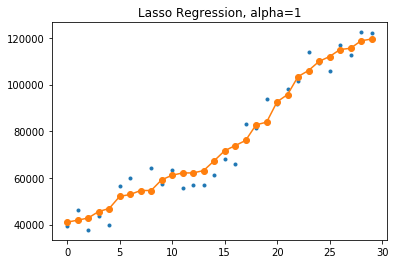

In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1, normalize=True)
lasso.fit(poly.fit_transform(X_train), y_train)
lasso.predict(poly.transform(X_test))
r2_las = r2_score(y_test, lasso.predict(poly.transform(X_test)))
print('R2-Score is: ', r2_las)

plt.title('Lasso Regression, alpha=1')
plt.plot(y, '.', lasso.predict(poly.transform(X)), '-o')
plt.show()

**Tenth**
- Set Range Of Alphas and Make A function to Select the Best One with resepct to R Squared Metric 
- Print Out How many Features has been Selected 

C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351604546.6286704, tolerance: 1475370.3307958334
  positive)


R2-score is:  0.9867729006897488


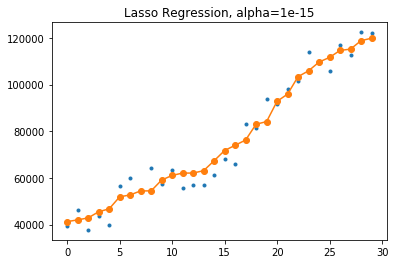

-----------------------------
R2-score is:  0.9867729006897744


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351604546.6001394, tolerance: 1475370.3307958334
  positive)


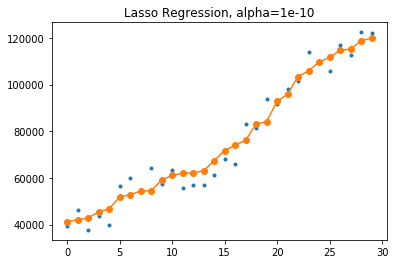

-----------------------------
R2-score is:  0.9867729006923069


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351604543.7755215, tolerance: 1475370.3307958334
  positive)


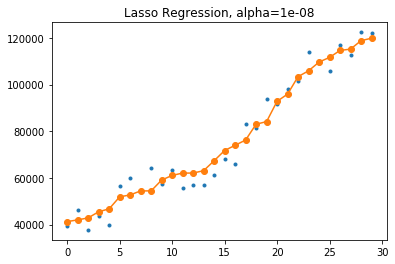

-----------------------------
R2-score is:  0.9867729032479325


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351601693.4872884, tolerance: 1475370.3307958334
  positive)


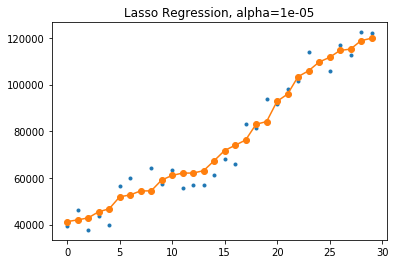

-----------------------------
R2-score is:  0.986772926271149


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351576016.0072639, tolerance: 1475370.3307958334
  positive)


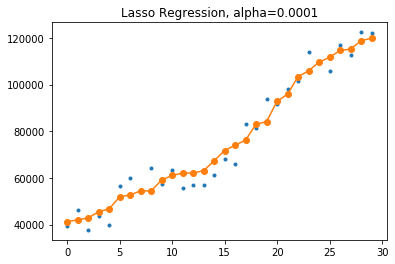

-----------------------------
R2-score is:  0.9867731563512724


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351319318.4020949, tolerance: 1475370.3307958334
  positive)


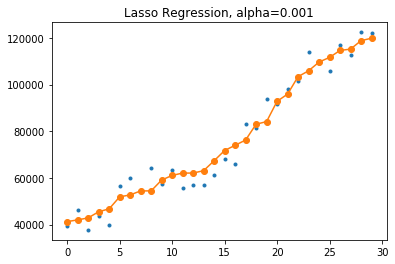

-----------------------------
R2-score is:  0.9867754479438792


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348760107.4346127, tolerance: 1475370.3307958334
  positive)


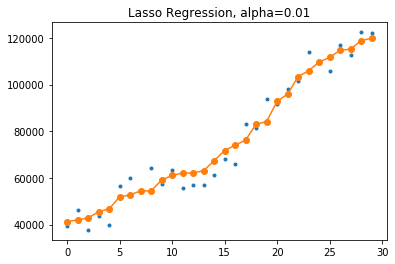

-----------------------------
R2-score is:  0.9869630693436251


C:\Users\Monmon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152252972.09707582, tolerance: 1475370.3307958334
  positive)


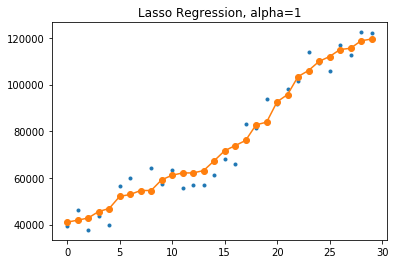

-----------------------------
R2-score is:  0.987134801965523


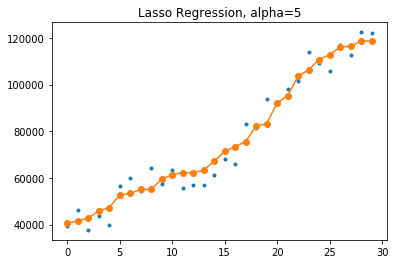

-----------------------------
R2-score is:  0.9875894409391652


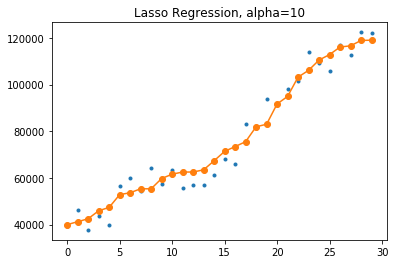

-----------------------------
R2-score is:  0.9880903107888384


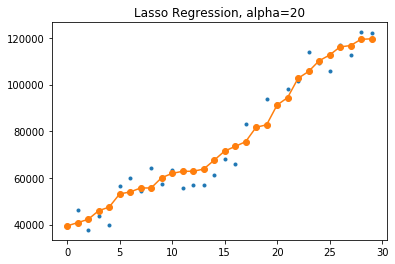

-----------------------------
R2-score is:  0.988301818725973


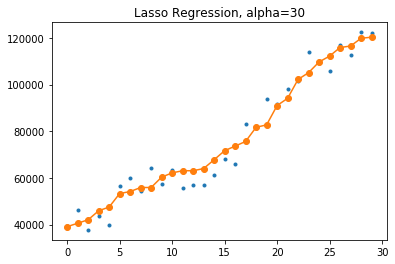

-----------------------------
R2-score is:  0.9883126329835937


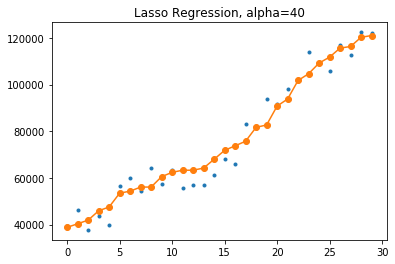

-----------------------------


0    40.000000
1     0.988313
Name: 12, dtype: float64

In [12]:
lst_las = []
for i in [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]:
    lasso = Lasso(alpha=i, normalize=True)
    lasso.fit(poly.fit_transform(X_train), y_train)
    r2_lasso = r2_score(y_test, lasso.predict(poly.transform(X_test)))
    print('R2-score is: ', r2_lasso)
    
    plt.title('Lasso Regression, alpha=%s' %i)
    plt.plot(y, '.', lasso.predict(poly.transform(X)), '-o')
    plt.show()
    
    lst = []
    lst.append(i)
    lst.append(r2_lasso)
    lst_las.append(lst)
    print('-----------------------------')
    
df_las = pd.DataFrame(lst_las)
df_las
df_las.iloc[df_las[1].idxmax()]

**Eleventh**

Here We come to the Final Step 
Make ONE BIG Function that when you call it would try all of the Regressors then Return the Name of the Regressor With the Highest R Squared 

In [15]:
def select_reg(X_train, X_test, y_train, y_test):
    lin_lst = ['Linear Regression']
    pol_lst = ['Polynomial Regression']
    rdg_lst = ['Ridge Regression']
    las_lst = ['Lasso Regression']
    lst = []
    
    lin_reg.fit(X_train, y_train)
    r2_lin = r2_score(y_test, lin_reg.predict(X_test))
    lin_lst.append(r2_lin)
    lst.append(lin_lst)
    
    pol_reg.fit(poly.fit_transform(X_train), y_train)
    r2_pol = r2_score(y_test, pol_reg.predict(poly.transform(X_test)))
    pol_lst.append(r2_pol)
    lst.append(pol_lst)
    
    rdg_reg.fit(poly.fit_transform(X_train), y_train)
    r2_rdg = r2_score(y_test, rdg_reg.predict(poly.transform(X_test)))
    rdg_lst.append(r2_rdg)
    lst.append(rdg_lst)
    
    las_reg.fit(poly.fit_transform(X_train), y_train)
    r2_las = r2_score(y_test, las_reg.predict(poly.transform(X_test)))
    las_lst.append(r2_las)
    lst.append(las_lst)
    
    df_reg = pd.DataFrame(lst)
    return df_reg.iloc[df_reg[1].idxmax()]

In [16]:
lin_reg = LinearRegression()
poly = PolynomialFeatures(degree=7)
pol_reg = LinearRegression()
rdg_reg = Ridge(alpha = 10, normalize= True)
las_reg = Lasso(alpha = 10, normalize= True)
select_reg(X_train, X_test, y_train, y_test)

0    Polynomial Regression
1                 0.989311
Name: 1, dtype: object

# **Great Job**